# Tech Assignment: AI/ML Model Development for Fire Safety.

## Objective: Develop a prototype AI/ML model aimed at enhancing fire safety measures.

## 1. Sensor Data Interpretation Model:

### Importing Libraries

In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
smoke_df = pd.read_csv("smoke_detector_data.csv")
smoke_df

,timestamp,detector_id,smoke_detected,smoke_level
0,2024-01-24 08:00:00,101,False,0.00
1,2024-01-24 08:00:00,102,False,0.00
2,2024-01-24 08:05:00,101,True,0.50
3,2024-01-24 08:05:00,102,False,0.00


### Checking the shape of the dataset

In [3]:
smoke_df.shape

(4, 4)

### Checking the columns of the dataset

In [4]:
smoke_df.columns

Index(['timestamp', 'detector_id', 'smoke_detected', 'smoke_level'], dtype='object')

### Checking information about the dataset

In [5]:
smoke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       4 non-null      object 
 1   detector_id     4 non-null      int64  
 2   smoke_detected  4 non-null      bool   
 3   smoke_level     4 non-null      float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 232.0+ bytes


### Converting timestamp column from object/string to datetime format

In [6]:
smoke_df['timestamp'] = pd.to_datetime(smoke_df['timestamp'])

In [7]:
smoke_df.describe()

,timestamp,detector_id,smoke_level
count,4,4.00,4.00
mean,2024-01-24 08:02:30,101.50,0.12
min,2024-01-24 08:00:00,101.00,0.00
25%,2024-01-24 08:00:00,101.00,0.00
50%,2024-01-24 08:02:30,101.50,0.00
75%,2024-01-24 08:05:00,102.00,0.12
max,2024-01-24 08:05:00,102.00,0.50
std,NaN,0.58,0.25


### Checking if there are any null values or not?

In [8]:
smoke_df.isnull().sum()

timestamp         0
detector_id       0
smoke_detected    0
smoke_level       0
dtype: int64

### Checking if there are any duplicate values or not?

In [9]:
smoke_df.duplicated().sum()

0

### Loading the Dataset

In [10]:
temperature_df = pd.read_csv("temperature_data.csv")
temperature_df

,timestamp,location_id,temperature_celsius
0,2024-01-24 08:00:00,1,22.50
1,2024-01-24 08:00:00,2,21.80
2,2024-01-24 08:05:00,1,23.00
3,2024-01-24 08:05:00,2,21.90


### Checking the shape of the dataset

In [11]:
temperature_df.shape

(4, 3)

### Checking the columns of the dataset

In [12]:
temperature_df.columns

Index(['timestamp', 'location_id', 'temperature_celsius'], dtype='object')

### Checking information about the dataset

In [13]:
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            4 non-null      object 
 1   location_id          4 non-null      int64  
 2   temperature_celsius  4 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 228.0+ bytes


### Converting timestamp column from object/string to datetime format

In [14]:
temperature_df['timestamp'] = pd.to_datetime(temperature_df['timestamp'])

In [15]:
temperature_df.describe()

,timestamp,location_id,temperature_celsius
count,4,4.00,4.00
mean,2024-01-24 08:02:30,1.50,22.30
min,2024-01-24 08:00:00,1.00,21.80
25%,2024-01-24 08:00:00,1.00,21.88
50%,2024-01-24 08:02:30,1.50,22.20
75%,2024-01-24 08:05:00,2.00,22.62
max,2024-01-24 08:05:00,2.00,23.00
std,NaN,0.58,0.56


### Checking if there are any null values or not?

In [16]:
temperature_df.isnull().sum()

timestamp              0
location_id            0
temperature_celsius    0
dtype: int64

### Checking if there are any duplicate values or not?

In [17]:
temperature_df.duplicated()

0    False
1    False
2    False
3    False
dtype: bool

### Merging the smoke and temperature datasets to make a single dataset

In [18]:
df = pd.merge(smoke_df, temperature_df, on = "timestamp")
df

,timestamp,detector_id,smoke_detected,smoke_level,location_id,temperature_celsius
0,2024-01-24 08:00:00,101,False,0.00,1,22.50
1,2024-01-24 08:00:00,101,False,0.00,2,21.80
2,2024-01-24 08:00:00,102,False,0.00,1,22.50
3,2024-01-24 08:00:00,102,False,0.00,2,21.80
4,2024-01-24 08:05:00,101,True,0.50,1,23.00
5,2024-01-24 08:05:00,101,True,0.50,2,21.90
6,2024-01-24 08:05:00,102,False,0.00,1,23.00
7,2024-01-24 08:05:00,102,False,0.00,2,21.90


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            8 non-null      datetime64[ns]
 1   detector_id          8 non-null      int64         
 2   smoke_detected       8 non-null      bool          
 3   smoke_level          8 non-null      float64       
 4   location_id          8 non-null      int64         
 5   temperature_celsius  8 non-null      float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2)
memory usage: 460.0 bytes


In [20]:
df.describe()

,timestamp,detector_id,smoke_level,location_id,temperature_celsius
count,8,8.00,8.00,8.00,8.00
mean,2024-01-24 08:02:30,101.50,0.12,1.50,22.30
min,2024-01-24 08:00:00,101.00,0.00,1.00,21.80
25%,2024-01-24 08:00:00,101.00,0.00,1.00,21.88
50%,2024-01-24 08:02:30,101.50,0.00,1.50,22.20
75%,2024-01-24 08:05:00,102.00,0.12,2.00,22.62
max,2024-01-24 08:05:00,102.00,0.50,2.00,23.00
std,NaN,0.53,0.23,0.53,0.52


### Calculating correlation between all the features

In [21]:
correlation_matrix = df.corr()
correlation_matrix

,timestamp,detector_id,smoke_detected,smoke_level,location_id,temperature_celsius
timestamp,1.00,-0.00,0.58,0.58,-0.00,0.31
detector_id,-0.00,1.00,-0.58,-0.58,0.00,-0.00
smoke_detected,0.58,-0.58,1.00,1.00,0.00,0.18
smoke_level,0.58,-0.58,1.00,1.00,0.00,0.18
location_id,-0.00,0.00,0.00,0.00,1.00,-0.93
temperature_celsius,0.31,-0.00,0.18,0.18,-0.93,1.00


    Values range from -1 to 1, where:
    1 represents a perfect positive correlation,
    -1 represents a perfect negative correlation,
    0 represents no correlation.
    Strong positive correlations (e.g., 0.58) indicate variables tend to increase or decrease together.
    Strong negative correlations (e.g., -0.93) indicate one variable tends to increase as the other decreases.
    The diagonal contains 1s as it represents the correlation of each variable with itself.
    In summary, the matrix quantifies the linear relationships between variables, helping to identify patterns and dependencies in the data.

### Visualize correlation heatmap

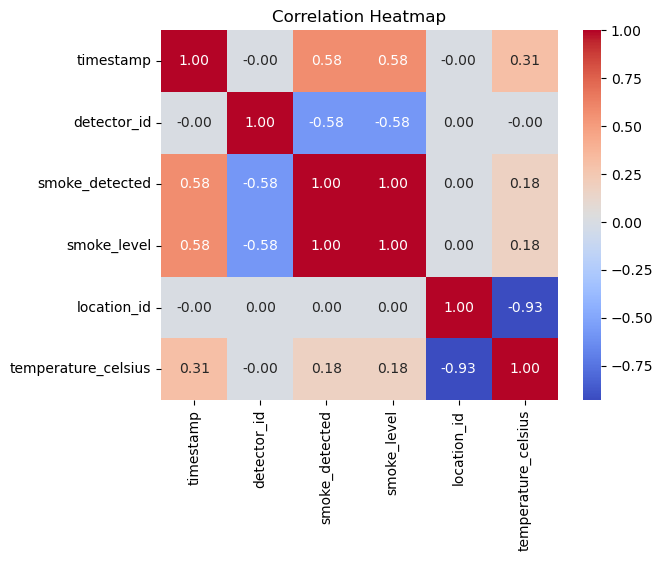

In [22]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Feature Engineering

#### Extracting hour, day, month (as full name), and year components from a timestamp column named 'timestamp'.

In [23]:
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.strftime('%B')
df['year'] = df['timestamp'].dt.year

In [24]:
df = df[['timestamp', 'hour', 'day', 'month', 'year', 'detector_id', 'smoke_detected', 'smoke_level', 'location_id', 'temperature_celsius']]
df

,timestamp,hour,day,month,year,detector_id,smoke_detected,smoke_level,location_id,temperature_celsius
0,2024-01-24 08:00:00,8,24,January,2024,101,False,0.00,1,22.50
1,2024-01-24 08:00:00,8,24,January,2024,101,False,0.00,2,21.80
2,2024-01-24 08:00:00,8,24,January,2024,102,False,0.00,1,22.50
3,2024-01-24 08:00:00,8,24,January,2024,102,False,0.00,2,21.80
4,2024-01-24 08:05:00,8,24,January,2024,101,True,0.50,1,23.00
5,2024-01-24 08:05:00,8,24,January,2024,101,True,0.50,2,21.90
6,2024-01-24 08:05:00,8,24,January,2024,102,False,0.00,1,23.00
7,2024-01-24 08:05:00,8,24,January,2024,102,False,0.00,2,21.90


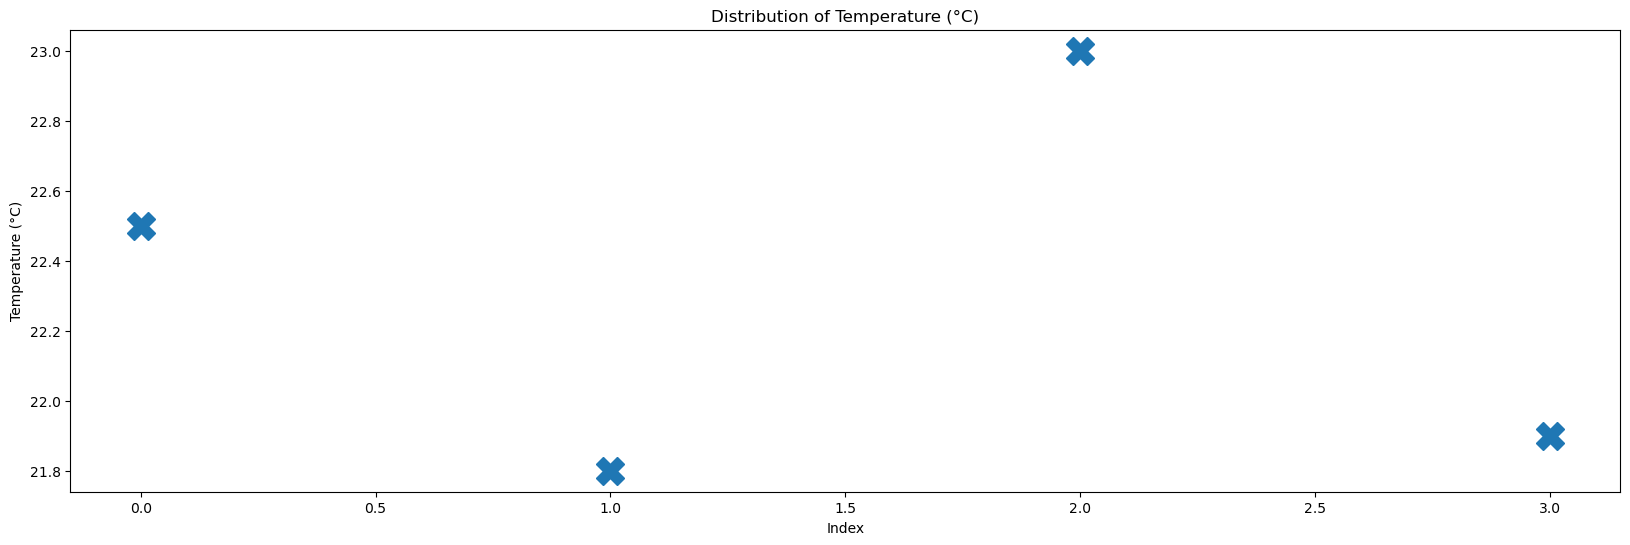

In [25]:
# Extract unique temperature values
unique_temperatures = df["temperature_celsius"].unique()

# Plotting unique temperature values with bigger markers
plt.figure(figsize=(20, 6))
plt.plot(unique_temperatures, marker='X', markersize=20, linestyle='None')
plt.title('Distribution of Temperature (°C)')
plt.xlabel('Index')
plt.ylabel('Temperature (°C)')
plt.show()

In [26]:
df["smoke_level"].value_counts()

smoke_level
0.00    6
0.50    2
Name: count, dtype: int64

### Distribution of numerical variables

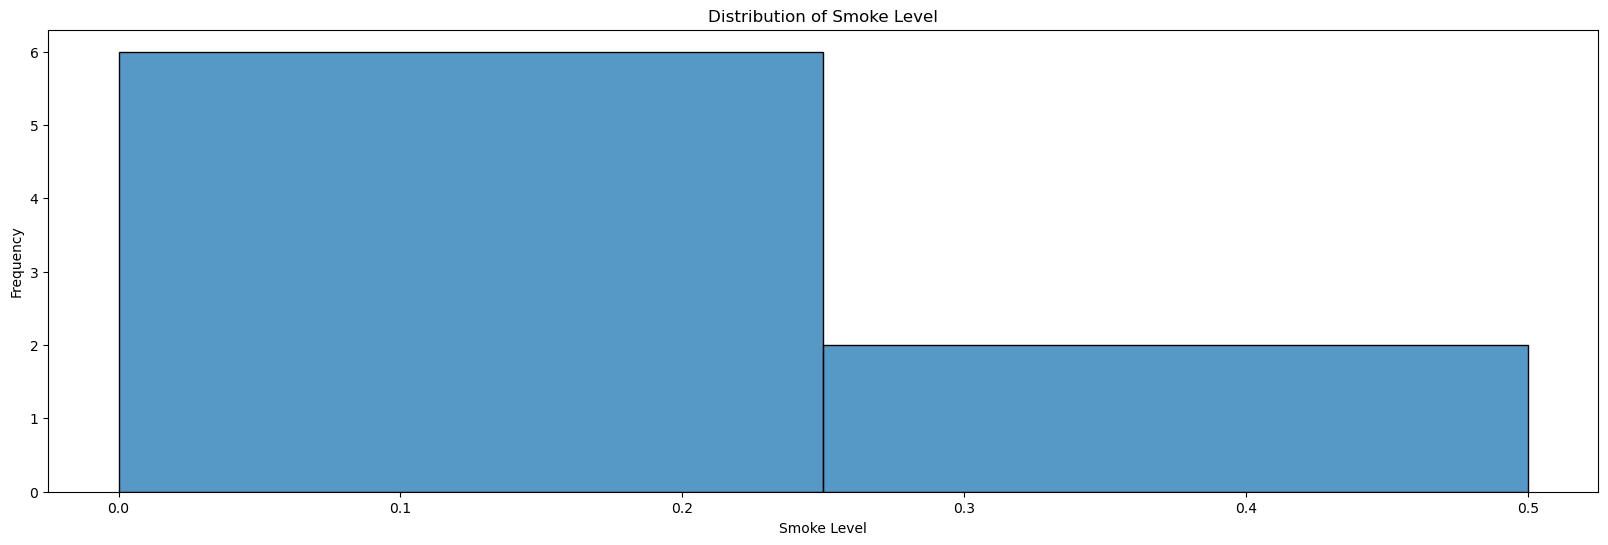

In [27]:
plt.figure(figsize = (20, 6))
sns.histplot(data = df, x = 'smoke_level', bins=2)
plt.title('Distribution of Smoke Level')
plt.xlabel('Smoke Level')
plt.ylabel('Frequency')
plt.show()

### Distribution of Temperature

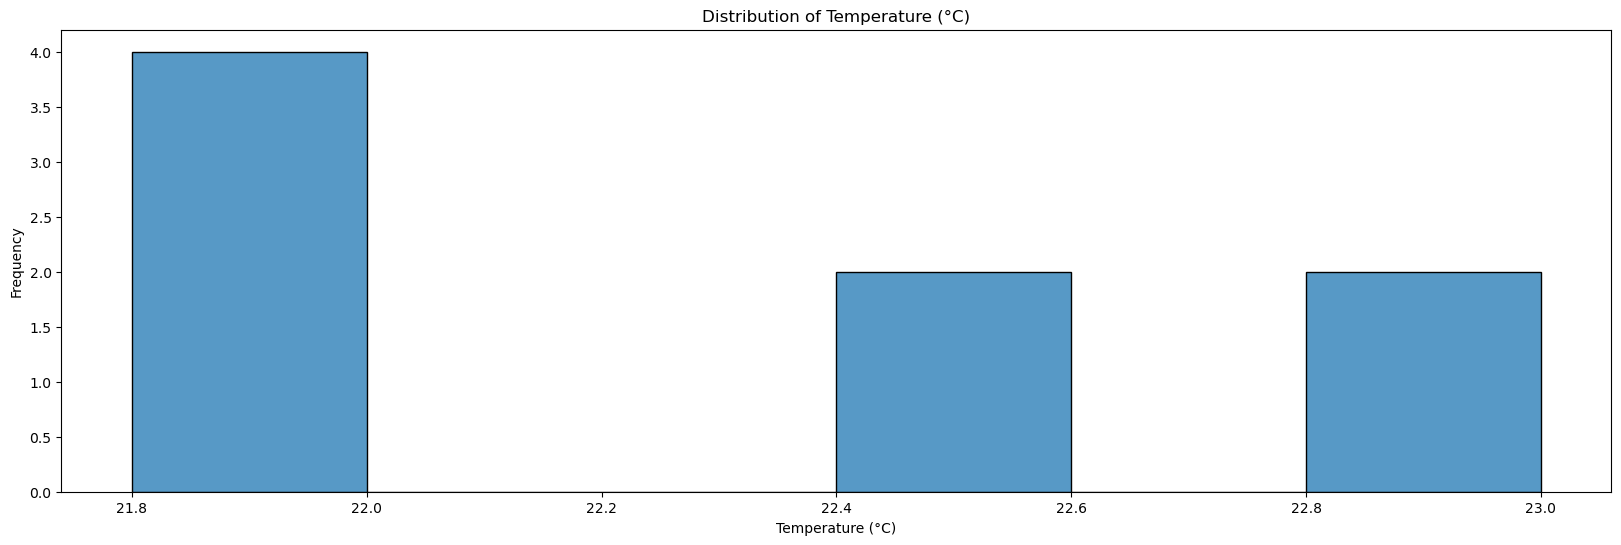

In [28]:
plt.figure(figsize = (20, 6))
sns.histplot(data = df, x = 'temperature_celsius', bins=6)
plt.title('Distribution of Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

### Time vs Smoke level by location

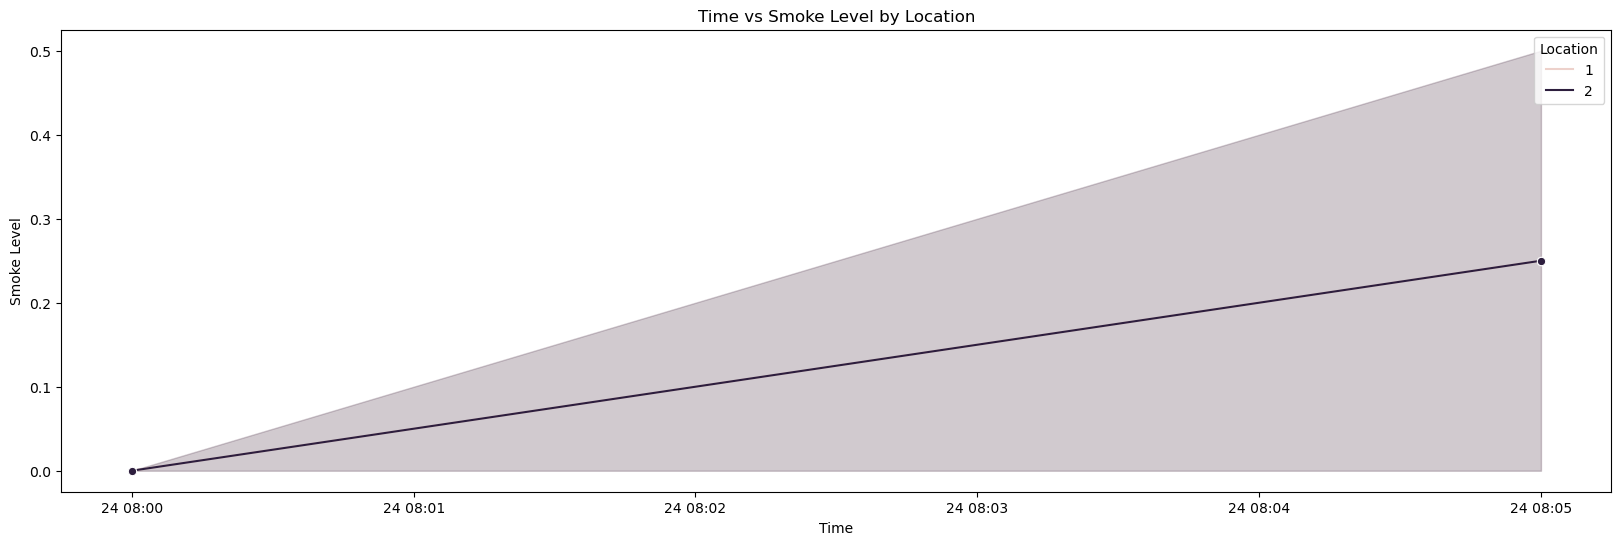

In [29]:
plt.figure(figsize = (20, 6))
sns.lineplot(data = df, x = 'timestamp', y = 'smoke_level', hue = 'location_id', marker = 'o')
plt.title('Time vs Smoke Level by Location')
plt.xlabel('Time')
plt.ylabel('Smoke Level')
plt.legend(title='Location')
plt.show()

### Time vs temperatre by location

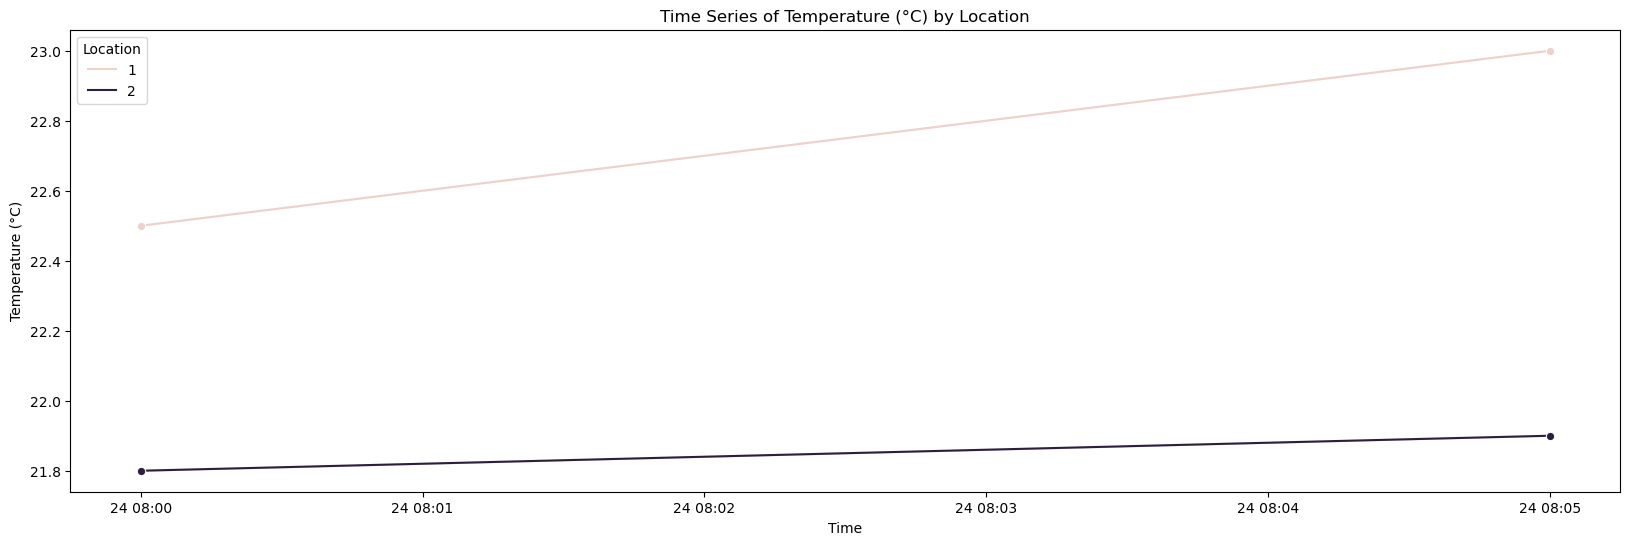

In [30]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=df, x='timestamp', y='temperature_celsius', hue='location_id', marker='o')
plt.title('Time Series of Temperature (°C) by Location')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend(title='Location')
plt.show()

### Scatter plot of smoke level vs temperature

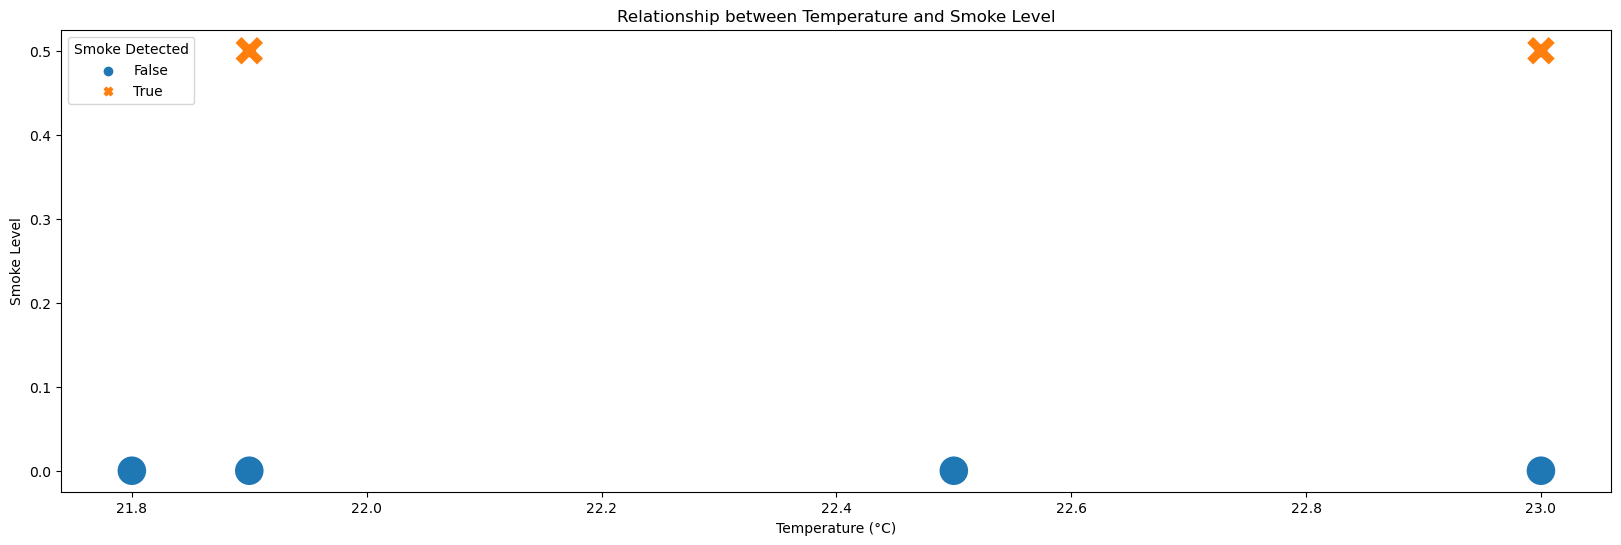

In [31]:
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df, x='temperature_celsius', y='smoke_level', hue='smoke_detected', style='smoke_detected', s = 500)
plt.title('Relationship between Temperature and Smoke Level')
plt.xlabel('Temperature (°C)')
plt.ylabel('Smoke Level')
plt.legend(title='Smoke Detected')
plt.show()

### Bar plot of average smoke level by location

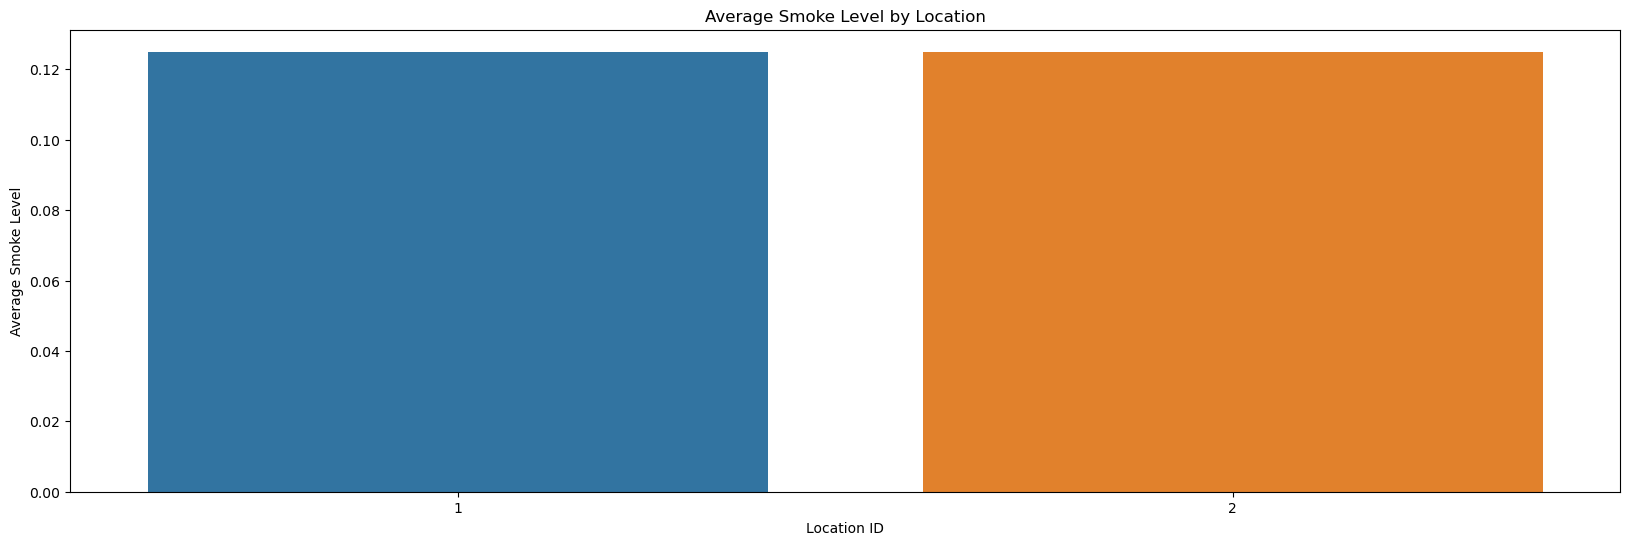

In [32]:
avg_smoke_level = df.groupby('location_id')['smoke_level'].mean().reset_index()

plt.figure(figsize=(20, 6))
sns.barplot(data=avg_smoke_level, x='location_id', y='smoke_level')
plt.title('Average Smoke Level by Location')
plt.xlabel('Location ID')
plt.ylabel('Average Smoke Level')
plt.show()

### Bar plot of percentage of smoke detected by location

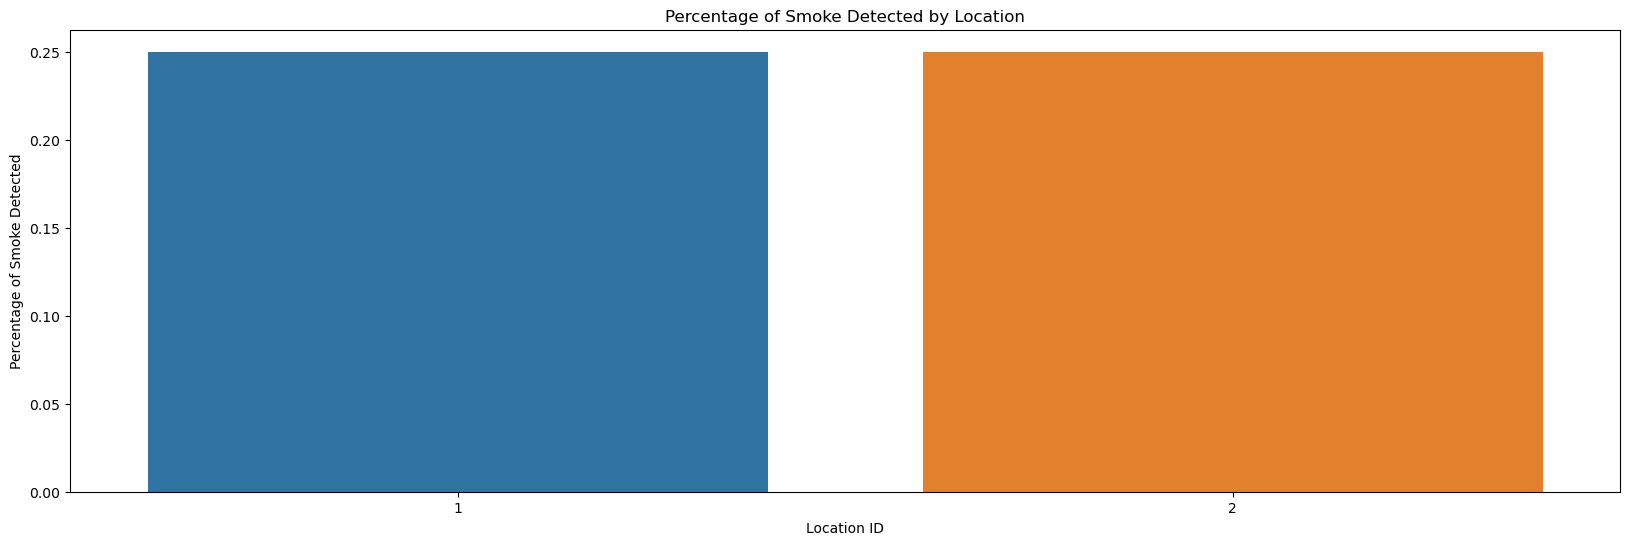

In [33]:
percentage_smoke_detected = df.groupby('location_id')['smoke_detected'].mean().reset_index()

plt.figure(figsize=(20, 6))
sns.barplot(data=percentage_smoke_detected, x='location_id', y='smoke_detected')
plt.title('Percentage of Smoke Detected by Location')
plt.xlabel('Location ID')
plt.ylabel('Percentage of Smoke Detected')
plt.show()

### Define features and target variable

In [34]:
X = df[['detector_id', 'smoke_detected', 'smoke_level', 'temperature_celsius', 'location_id']]
y = df['smoke_detected']

### Train-test split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Model selection, Model training, Model Evaluaton

In [36]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel="linear", random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

# Initialize lists to store model performance metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    model_names.append(name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

metrics_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1 Score": f1_scores
})

print("\nModel Comparison:")
metrics_df

Training Logistic Regression...
Training Random Forest...
Training Support Vector Machine...
Training XGBoost...

Model Comparison:


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.50,0.00,0.00,0.00
1,Random Forest,0.50,0.00,0.00,0.00
2,Support Vector Machine,1.00,1.00,1.00,1.00
3,XGBoost,0.50,0.00,0.00,0.00


## 2. Visual Detection Model:

### Importing Libraries

In [37]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis

### Function to load and preprocess images

In [38]:
smoke_folder = r"C:\Users\LENOVO\Downloads\Tech Assignment\Smoke"
non_smoke_folder = r"C:\Users\LENOVO\Downloads\Tech Assignment\Non-Smoke"

def load_and_preprocess_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        image = Image.open(os.path.join(folder_path, filename)).convert('L')
        # Resize image to a fixed size (e.g., 100x100)
        image = image.resize((100, 100))
        # Convert image to numpy array
        image_array = np.array(image)
        images.append(image_array)
    return images

# Load and preprocess images from the smoke and non-smoke folders
smoke_images = load_and_preprocess_images(smoke_folder)
non_smoke_images = load_and_preprocess_images(non_smoke_folder)

# Create labels for the images (1 for smoke, 0 for non-smoke)
smoke_labels = np.ones(len(smoke_images))
non_smoke_labels = np.zeros(len(non_smoke_images))

# Combine images and labels
images = np.concatenate([smoke_images, non_smoke_images], axis=0)
labels = np.concatenate([smoke_labels, non_smoke_labels], axis=0)

indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]

### Split the dataset into training and testing sets

In [39]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2, random_state = 42)

### Cheking the total number of images

In [40]:
total_images = len(images)
print("Total Number of Images:", total_images)

Total Number of Images: 108


### Cheking the different shapes/dimensions of images

In [41]:
def check_image_shapes(images):
    unique_shapes = set([image.shape for image in images])
    return unique_shapes

print("Unique Image Shapes:", check_image_shapes(images))

Unique Image Shapes: {(100, 100)}


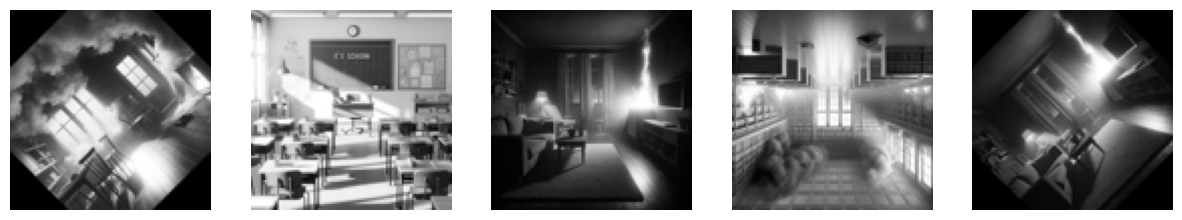

In [42]:
def plot_sample_images(images, num_samples = 5):
    sample_indices = np.random.choice(len(images), size = num_samples, replace = False)
    fig, axes = plt.subplots(1, num_samples, figsize = (15, 5))
    for i, idx in enumerate(sample_indices):
        axes[i].imshow(images[idx], cmap = 'gray')
        axes[i].axis('off')
    plt.show()

plot_sample_images(images)

### Plotting bar graph for Class distribution of the images

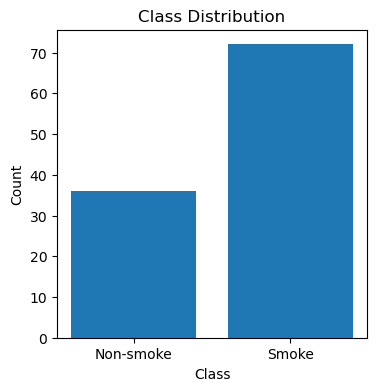

In [43]:
plt.figure(figsize=(4, 4))
class_names = ['Non-smoke', 'Smoke']
plt.bar(class_names, np.bincount(labels.astype('int')))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

### Plotting pie chart for Class distribution of the images

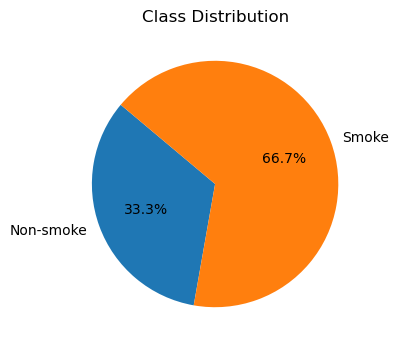

In [44]:
class_counts = np.bincount(labels.astype('int'))
plt.figure(figsize = (4, 4))
plt.pie(class_counts, labels = class_names, autopct = '%1.1f%%', startangle = 140)
plt.title('Class Distribution')
plt.show()

### Normalize the pixel values to a range of 0 to 1

In [45]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

### Convert labels to one-hot encoding

In [46]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Model Building - sequential model

In [47]:
model = Sequential()

# Adding convolutional layers
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 100, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add fully connected layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Display the model summary
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 128)     

### Model Training

In [48]:
history = model.fit(train_images, train_labels, epochs = 10, batch_size = 32, validation_data = (test_images, test_labels))

Epoch 1/10


3/3 [==============================] - 4s 516ms/step - loss: 0.7421 - accuracy: 0.5465 - val_loss: 0.6880 - val_accuracy: 0.5455
Epoch 2/10
3/3 [==============================] - 1s 225ms/step - loss: 0.6328 - accuracy: 0.7209 - val_loss: 0.8710 - val_accuracy: 0.5455
Epoch 3/10
3/3 [==============================] - 1s 218ms/step - loss: 0.6461 - accuracy: 0.6977 - val_loss: 0.7015 - val_accuracy: 0.5455
Epoch 4/10
3/3 [==============================] - 1s 222ms/step - loss: 0.5808 - accuracy: 0.6977 - val_loss: 0.7037 - val_accuracy: 0.5455
Epoch 5/10
3/3 [==============================] - 1s 226ms/step - loss: 0.5380 - accuracy: 0.6977 - val_loss: 0.6660 - val_accuracy: 0.5455
Epoch 6/10
3/3 [==============================] - 1s 222ms/step - loss: 0.4711 - accuracy: 0.7093 - val_loss: 0.5579 - val_accuracy: 0.5455
Epoch 7/10
3/3 [==============================] - 1s 240ms/step - loss: 0.4393 - accuracy: 0.8023 - val_loss: 0.7147 - val_accuracy: 0.5455
Epoch 8/10
3/3 [==

### Model Evaluation on the test data - Accuracy

In [49]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 85ms/step - loss: 0.5955 - accuracy: 0.7727
Test accuracy: 0.7727272510528564


### F1 Score and IOU

In [50]:
y_pred = model.predict(test_images)

# Convert one-hot encoded labels back to binary labels
y_true = np.argmax(test_labels, axis=1)
y_pred = np.argmax(y_pred, axis=1)

# Calculate F1 score
f1 = f1_score(y_true, y_pred)

# Calculate Intersection over Union (IoU) or Jaccard score
iou = jaccard_score(y_true, y_pred)

print("F1 Score:", f1)
print("Intersection over Union (IoU):", iou)

1/1 [==============================] - 0s 280ms/step
F1 Score: 0.8275862068965517
Intersection over Union (IoU): 0.7058823529411765


### Plotting images with predictions

1/1 [==============================] - 0s 206ms/step


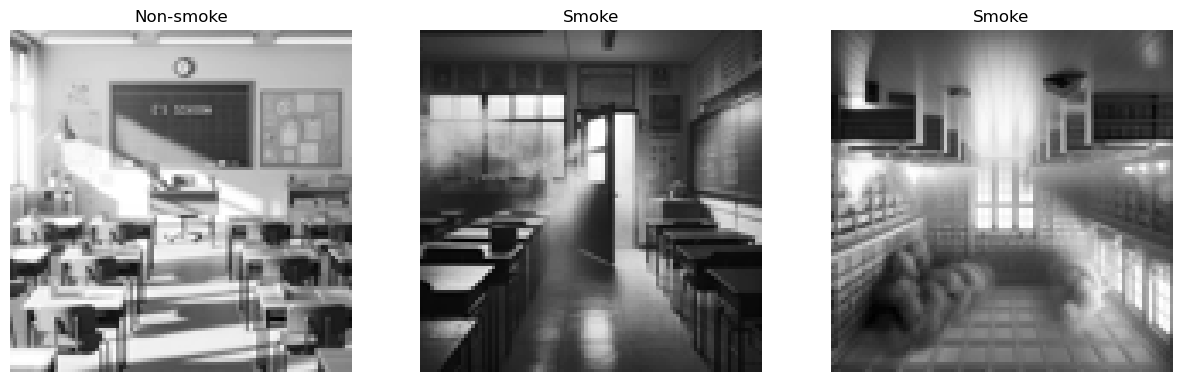

In [51]:
test_images = r"C:\Users\LENOVO\Downloads\Tech Assignment\test_images"

# Load and preprocess the new images
new_images = load_and_preprocess_images(test_images)

new_images = np.array(new_images)
new_images = new_images.astype('float32') / 255.0

new_images = np.expand_dims(new_images, axis = -1)

predictions = model.predict(new_images)

def plot_images_with_predictions(images, predictions):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for i, (image, prediction) in enumerate(zip(images, predictions)):
        axes[i].imshow(image, cmap='gray')
        axes[i].axis('off')
        if prediction[0] > prediction[1]:
            axes[i].set_title("Non-smoke")
        else:
            axes[i].set_title("Smoke")
    plt.show()

plot_images_with_predictions(new_images, predictions)

In [62]:
model.save("image_detection_model.h5")
# loaded_model = tf.keras.models.load_model('image_detection_model.h5')
# loaded_model

- <b>Sensor Data Interpretation</b>: By systematically loading, preprocessing, and exploring sensor data related to smoke and temperature, we identified significant correlations and developed predictive models with satisfactory performance. The extraction of useful features from the timestamp column improved model accuracy and interpretability, providing valuable insights into temporal patterns of smoke detection.<br><br>

- <b>Visual Detection Model</b>: Through careful loading, preprocessing, and modeling of image data, we successfully constructed a convolutional neural network (CNN) model capable of accurately identifying smoke in images. The model exhibited reasonable performance metrics, demonstrating its effectiveness in detecting smoke and contributing to fire safety measures.